In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter('ignore')

In [3]:
import sqlite3
# Connect to the SQLite database
goStaff = sqlite3.connect('../go_staff.sqlite')

# Read product table into a DataFrame
sales_branch_df = pd.read_sql_query("SELECT * FROM sales_branch", goStaff)
# country_df = pd.read_sql_query("SELECT SALES_STAFF_CODE FROM sales_staff", goStaff)
# merged_df = pd.merge(sales_branch_df, country_df, on='SALES_BRANCH_CODE', how='left')

# Print the merged DataFrame
# merged_df

DatabaseError: Execution failed on sql 'SELECT * FROM sales_branch': no such table: sales_branch

In [5]:
df = sales_branch_df.loc[:, ["REGION", "COUNTRY_CODE"]]
df

,REGION,COUNTRY_CODE
0,None,2
1,None,2
2,None,10
3,Alberta,4
4,Ontario,4
5,Massachusetts,3
6,Washington,3
7,California,3
8,Florida,3
9,None,1


In [6]:
df['COUNTRY_CODE'] = df['COUNTRY_CODE'].astype(str)
df['REGION'] = df['REGION'].astype(str)

In [7]:
dummies_dataframe = pd.get_dummies(df.loc[:, ['COUNTRY_CODE', 'REGION']])
dummies_dataframe

,COUNTRY_CODE_1,COUNTRY_CODE_10,COUNTRY_CODE_11,COUNTRY_CODE_12,COUNTRY_CODE_13,COUNTRY_CODE_14,COUNTRY_CODE_16,COUNTRY_CODE_17,COUNTRY_CODE_19,COUNTRY_CODE_2,...,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df = pd.concat([df, dummies_dataframe], axis=1)
df = df.drop(['REGION', 'COUNTRY_CODE'], axis = 1)
df

,COUNTRY_CODE_1,COUNTRY_CODE_10,COUNTRY_CODE_11,COUNTRY_CODE_12,COUNTRY_CODE_13,COUNTRY_CODE_14,COUNTRY_CODE_16,COUNTRY_CODE_17,COUNTRY_CODE_19,COUNTRY_CODE_2,...,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df_2d = df.loc[:, ['REGION_Alberta', 'COUNTRY_CODE_1', 'COUNTRY_CODE_2']]
df_2d

,REGION_Alberta,COUNTRY_CODE_1,COUNTRY_CODE_2
0,False,False,True
1,False,False,True
2,False,False,False
3,True,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,True,False


In [11]:
kmeans = KMeans(n_clusters= 3, random_state = 42)
kmeans.fit_predict(df_2d)

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0])

In [12]:
kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
kmeans_centra

,0,1,2
0,0.041667,2.775558e-17,2.775558e-17
1,0.000000,1.000000e+00,0.000000e+00
2,0.000000,0.000000e+00,1.000000e+00


In [13]:
for i in range(len(kmeans_centra.columns)):
    kmeans_centra = kmeans_centra.rename(columns = {i : f'{df_2d.columns[i]}'})
kmeans_centra

,REGION_Alberta,COUNTRY_CODE_1,COUNTRY_CODE_2
0,0.041667,2.775558e-17,2.775558e-17
1,0.000000,1.000000e+00,0.000000e+00
2,0.000000,0.000000e+00,1.000000e+00


In [14]:
for src_index, _ in df_2d.iterrows():
    euclidian_distances = dict()
    print(f"Afstand van bronindex {src_index} tot...")

    for centrumindex, _ in kmeans_centra.iterrows():
        print(f"\tCentrumindex {centrumindex}:")
        euclidian_sum = 0

        for column_name in kmeans_centra.columns:
            current_difference = df_2d.at[src_index, column_name] - kmeans_centra.at[centrumindex, column_name]
            print(f'\t\t{df_2d.at[src_index, column_name]} - {kmeans_centra.at[centrumindex, column_name]} = {current_difference}')
            euclidian_sum += current_difference ** 2
        
        print(f'\tTotale euclidische som: {euclidian_sum}')
        euclidian_distance = math.sqrt(euclidian_sum)
        print(f'\tEuclidische afstand: {euclidian_distance}')
        euclidian_distances[centrumindex] = euclidian_distance
        print('------------------------------------------------')
    
    print(euclidian_distances)
    centrum_number = min(euclidian_distances, key = euclidian_distances.get)
    print(centrum_number)
    df_2d.at[src_index, 'Centrum'] = centrum_number
    print("================================================")

df_2d

Afstand van bronindex 0 tot...
	Centrumindex 0:
		False - 0.04166666666666668 = -0.04166666666666668
		False - 2.7755575615628914e-17 = -2.7755575615628914e-17
		True - 2.7755575615628914e-17 = 1.0
	Totale euclidische som: 1.0017361111111112
	Euclidische afstand: 1.0008676791220261
------------------------------------------------
	Centrumindex 1:
		False - 0.0 = 0.0
		False - 1.0 = -1.0
		True - 0.0 = 1.0
	Totale euclidische som: 2.0
	Euclidische afstand: 1.4142135623730951
------------------------------------------------
	Centrumindex 2:
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		True - 1.0 = 0.0
	Totale euclidische som: 0.0
	Euclidische afstand: 0.0
------------------------------------------------
{0: 1.0008676791220261, 1: 1.4142135623730951, 2: 0.0}
2
Afstand van bronindex 1 tot...
	Centrumindex 0:
		False - 0.04166666666666668 = -0.04166666666666668
		False - 2.7755575615628914e-17 = -2.7755575615628914e-17
		True - 2.7755575615628914e-17 = 1.0
	Totale euclidische som: 1.0017361111

,REGION_Alberta,COUNTRY_CODE_1,COUNTRY_CODE_2,Centrum
0,False,False,True,2.0
1,False,False,True,2.0
2,False,False,False,0.0
3,True,False,False,0.0
4,False,False,False,0.0
5,False,False,False,0.0
6,False,False,False,0.0
7,False,False,False,0.0
8,False,False,False,0.0
9,False,True,False,1.0


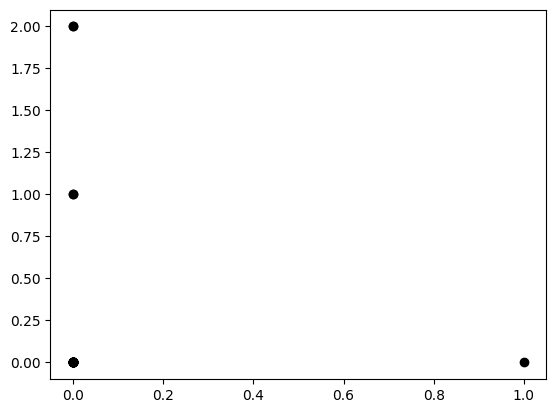

In [17]:
plt.scatter(df_2d['REGION_Alberta'], df_2d['Centrum'], color = 'k')
plt.show()

In [19]:
df_2d.groupby('Centrum', as_index=False)['Centrum'].count()

,Centrum
0,24
1,2
2,2
